<a href="https://colab.research.google.com/github/tinaghimire/data-mining/blob/main/Lab-3_Naive_Bayes/Titanicv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fuse/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Pclass---  Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

SibSp---- No. of siblings / spouses aboard the Titanic

Parch --- No. of parents / children aboard the Titanic

Fare ---- Passenger fare

Embarked -- Embarked implies where the traveler mounted from. There are three possible values for Embark —

S - Southampton,
C - Cherbourg, and
Q - Queenstown

In [ ]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket', 'Cabin', 'Embarked'], axis = 1)
df

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
df.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
count = df['Survived'].value_counts()
count = pd.DataFrame(count)
count

,count
Survived,
0,549
1,342


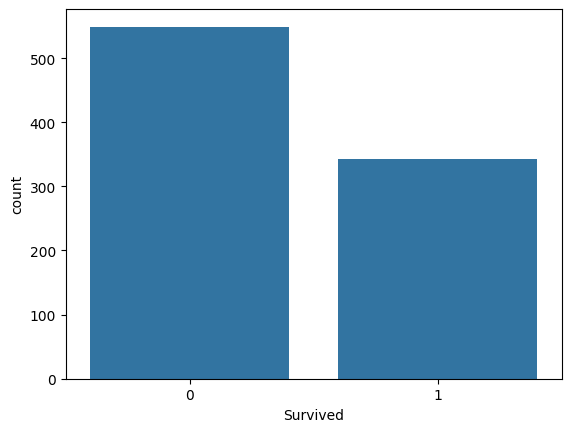

In [ ]:
sns.countplot(data=df, x='Survived')
plt.show()

In [ ]:
count = df.groupby('Gender')['Survived'].value_counts()
count / len(df) * 100

Gender  Survived
female  1           26.150393
        0            9.090909
male    0           52.525253
        1           12.233446
Name: count, dtype: float64

In [ ]:
count = pd.pivot_table(df, values='Survived', index='Gender', columns='Pclass', aggfunc="mean")
count

Pclass,1,2,3
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
import matplotlib.pyplot as plt

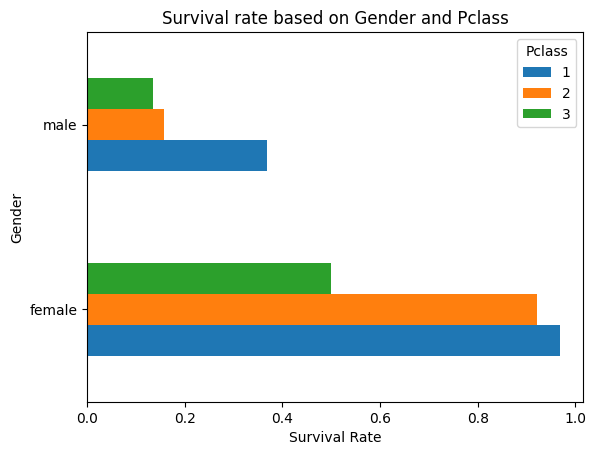

In [ ]:
count.plot.barh()
plt.title("Survival rate based on Gender and Pclass")
plt.xlabel("Survival Rate")
plt.ylabel("Gender")
plt.show()

# Discretize the age column

In [ ]:
df['Age'] = pd.cut(df['Age'], bins=5)
df

,Pclass,Gender,Age,Fare,Survived
0,3,male,"(16.336, 32.252]",7.2500,0
1,1,female,"(32.252, 48.168]",71.2833,1
2,3,female,"(16.336, 32.252]",7.9250,1
3,1,female,"(32.252, 48.168]",53.1000,1
4,3,male,"(32.252, 48.168]",8.0500,0
...,...,...,...,...,...
886,2,male,"(16.336, 32.252]",13.0000,0
887,1,female,"(16.336, 32.252]",30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,"(16.336, 32.252]",30.0000,1


In [ ]:
count = pd.pivot_table(df, values='Survived', index=['Gender', 'Pclass'] , columns='Age', aggfunc="mean", fill_value=0)
count

Age            (0.34, 16.336]  (16.336, 32.252]  (32.252, 48.168]  \
Gender Pclass                                                       
female 1             0.833333          0.968750          1.000000   
       2             1.000000          0.916667          0.909091   
       3             0.545455          0.461538          0.250000   
male   1             1.000000          0.444444          0.435897   
       2             0.818182          0.062500          0.074074   
       3             0.270270          0.165563          0.055556   

Age            (48.168, 64.084]  (64.084, 80.0]  
Gender Pclass                                    
female 1               0.941176        0.000000  
       2               0.833333        0.000000  
       3               1.000000        0.000000  
male   1               0.269231        0.166667  
       2               0.090909        0.000000  
       3               0.000000        0.000000

In [ ]:
count = count.stack('Age').reset_index()
count

,Gender,Pclass,Age,0
0,female,1,"(0.34, 16.336]",0.833333
1,female,1,"(16.336, 32.252]",0.968750
2,female,1,"(32.252, 48.168]",1.000000
3,female,1,"(48.168, 64.084]",0.941176
4,female,1,"(64.084, 80.0]",0.000000
5,female,2,"(0.34, 16.336]",1.000000
6,female,2,"(16.336, 32.252]",0.916667
7,female,2,"(32.252, 48.168]",0.909091
8,female,2,"(48.168, 64.084]",0.833333
9,female,2,"(64.084, 80.0]",0.000000


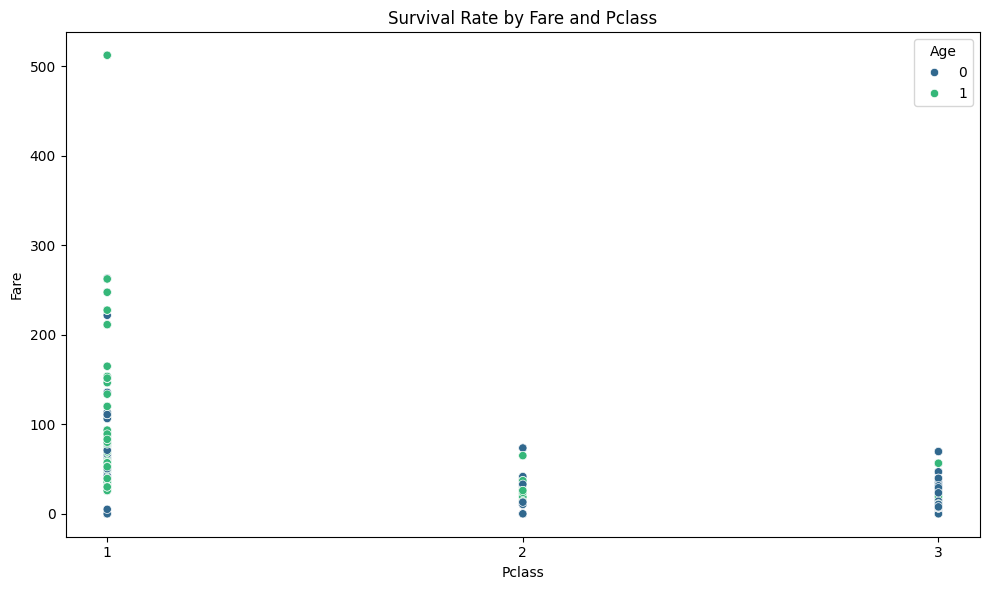

In [ ]:
count.columns = ['Gender', 'Pclass', 'Age', 'Survival Rate']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='viridis')
plt.legend(title='Age')
plt.title('Survival Rate by Fare and Pclass')
plt.ylabel('Fare')
plt.xlabel('Pclass')
plt.xticks(range(1, 4))
plt.tight_layout()
plt.show()

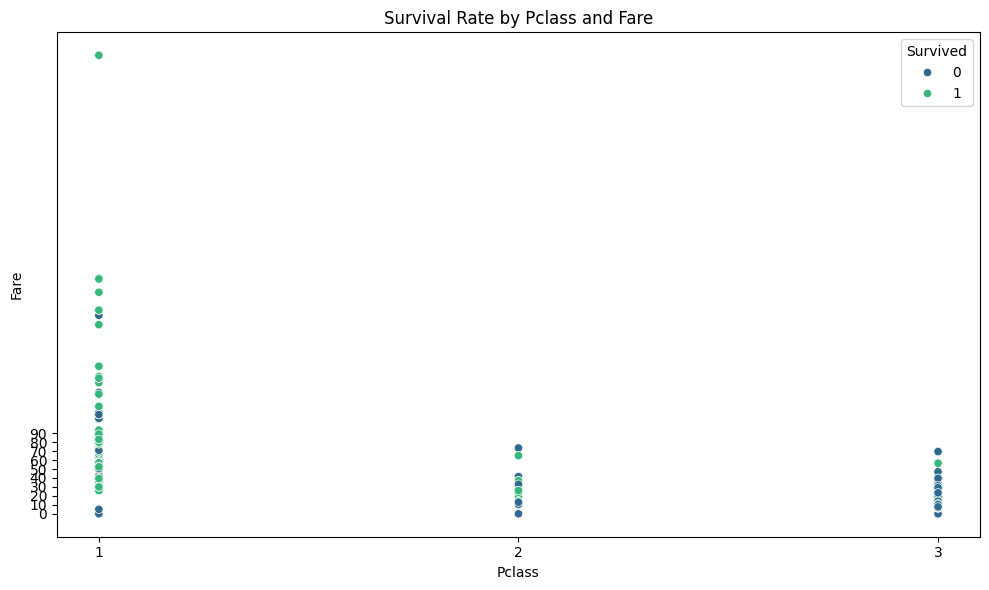

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='viridis')
plt.legend(title='Survived')
plt.title('Survival Rate by Pclass and Fare')
plt.ylabel('Fare')
plt.xlabel('Pclass')
plt.xticks(range(1, 4))
plt.yticks(range(0, 100, 10))
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fuse/titanic.csv")
df = df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis = 1)

# X = df.drop('Survived', axis=1)
# y = df['Survived']
df.shape

(891, 8)

In [ ]:
df.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [ ]:
df.duplicated().sum()

111

In [ ]:
df = df.drop_duplicates()
df.shape

(780, 8)

# Imputing missing values


In [ ]:
df.isnull().sum()

Pclass        0
Gender        0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [ ]:
# df['Age'] = df['Age'].fillna(round(np.mean(df['Age'])))
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df['Age'] = df['Age'].astype(int)
df.head()

<ipython-input-22-3e9e63ed2251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(np.mean(df['Age']))
<ipython-input-22-3e9e63ed2251>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
1,1,female,38,1,0,71.2833,C,1
2,3,female,26,0,0,7.9250,S,1
3,1,female,35,1,0,53.1000,S,1
4,3,male,35,0,0,8.0500,S,0


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
1,1,female,38,1,0,71.2833,C,1
2,3,female,26,0,0,7.9250,S,1
3,1,female,35,1,0,53.1000,S,1
4,3,male,35,0,0,8.0500,S,0


# Handling Outliers


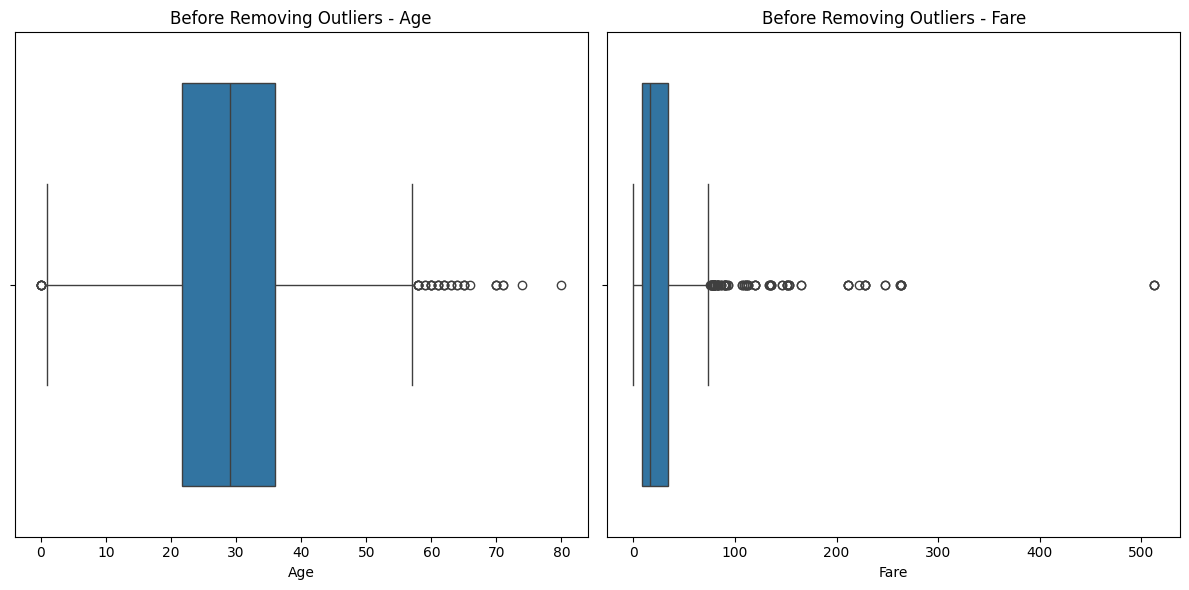

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for 'Age' before removing outliers
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Before Removing Outliers - Age')

# Boxplot for 'Fare' before removing outliers
sns.boxplot(x=df['Fare'], ax=axes[1])
axes[1].set_title('Before Removing Outliers - Fare')

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from 'Age' and 'Fare'
df_cleaned = df.copy()
df_cleaned = remove_outliers(df_cleaned, 'Age')
df_cleaned = remove_outliers(df_cleaned, 'Fare')

0.375 57.375
-29.187499999999996 70.1125


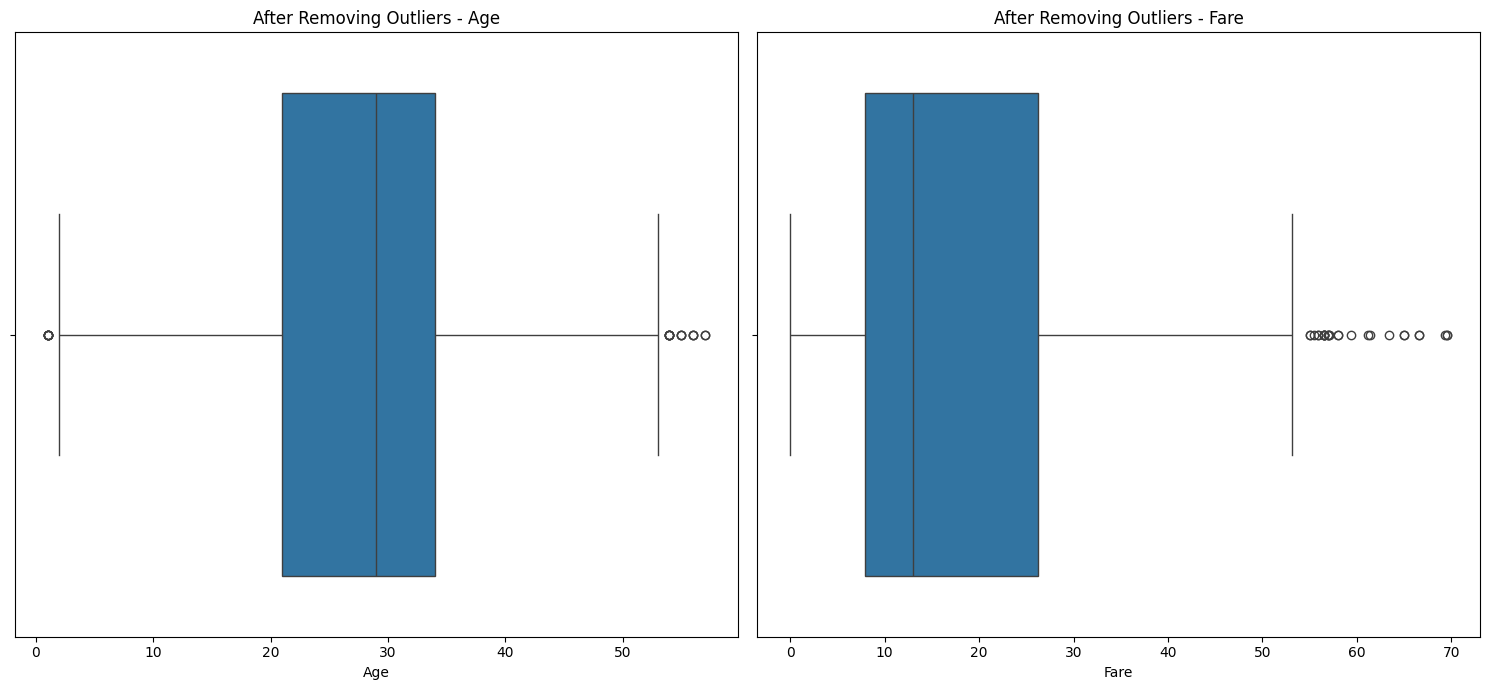

In [ ]:
# Plotting boxplots after removing outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Boxplot for 'Age' after removing outliers
sns.boxplot(x=df_cleaned['Age'], ax=axes[0])
axes[0].set_title('After Removing Outliers - Age')

# Boxplot for 'Fare' after removing outliers
sns.boxplot(x=df_cleaned['Fare'], ax=axes[1])
axes[1].set_title('After Removing Outliers - Fare')

plt.tight_layout()
plt.show()


In [ ]:
df = df_cleaned
df.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
2,3,female,26,0,0,7.9250,S,1
3,1,female,35,1,0,53.1000,S,1
4,3,male,35,0,0,8.0500,S,0
5,3,male,29,0,0,8.4583,Q,0


In [ ]:
df.shape # from 819 to 718

(647, 8)

# Handling Imbalanced Classes

In [ ]:
df['Survived'].value_counts()

Survived
0    410
1    237
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

up_sampled_survived = resample(survived, n_samples=len(not_survived), replace=True)
up_sampled_df = pd.concat([not_survived, up_sampled_survived])
up_sampled_df.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
4,3,male,35,0,0,8.0500,S,0
5,3,male,29,0,0,8.4583,Q,0
6,1,male,54,0,0,51.8625,S,0
7,3,male,2,3,1,21.0750,S,0


In [ ]:
from collections import Counter

In [ ]:
original_class_counts = Counter(df['Survived'])
original_class_counts

Counter({0: 410, 1: 237})

In [ ]:
resampled_class_counts = Counter(up_sampled_df['Survived'])
resampled_class_counts

Counter({0: 410, 1: 410})

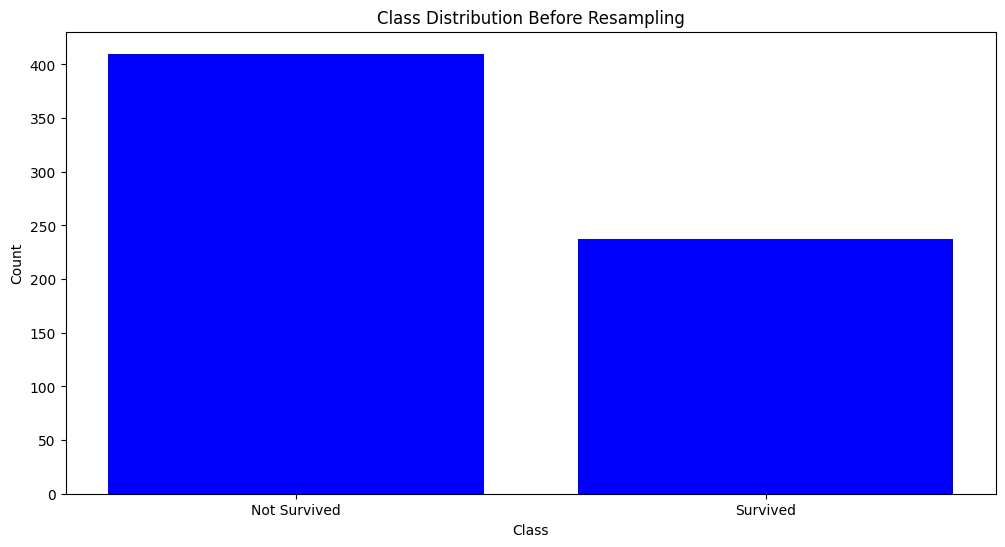

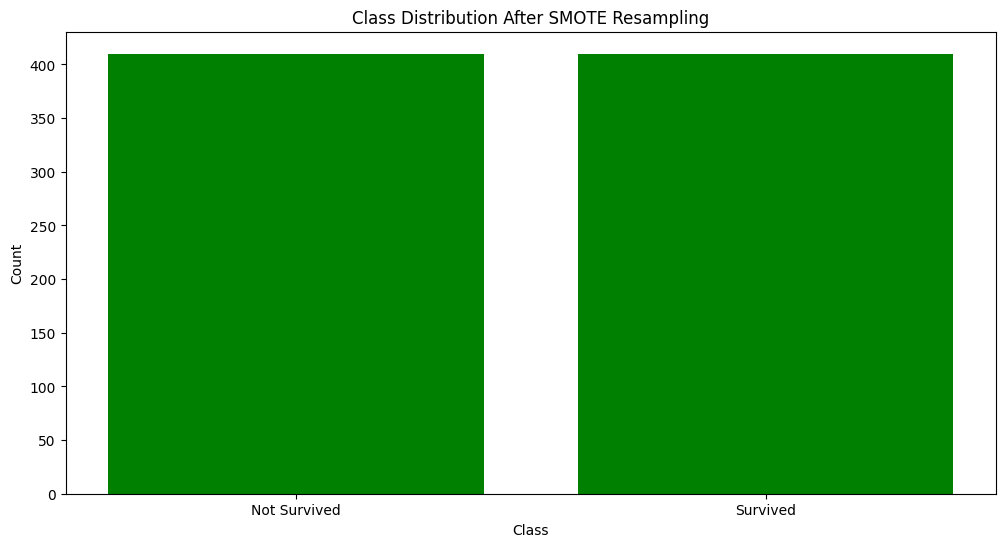

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot before resampling
plt.bar(original_class_counts.keys(), original_class_counts.values(), color='blue')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Plot after resampling
plt.figure(figsize=(12, 6))

plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='green')
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [ ]:
up_sampled_df['Survived'].value_counts()

Survived
0    410
1    410
Name: count, dtype: int64

In [ ]:
df = up_sampled_df
df.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22,1,0,7.2500,S,0
4,3,male,35,0,0,8.0500,S,0
5,3,male,29,0,0,8.4583,Q,0
6,1,male,54,0,0,51.8625,S,0
7,3,male,2,3,1,21.0750,S,0


In [ ]:
df.shape

(820, 8)

# Label encoding for Categorical data

In [ ]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Combine features

In [ ]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,Pclass,Gender,Age,Fare,Embarked,Survived,Family
0,3,1,22,7.2500,2,0,2
4,3,1,35,8.0500,2,0,1
5,3,1,29,8.4583,1,0,1
6,1,1,54,51.8625,2,0,1
7,3,1,2,21.0750,2,0,5


In [ ]:
df.describe()

,Pclass,Gender,Age,Fare,Embarked,Survived,Family
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.00000
mean,2.440244,0.582927,27.489024,19.461855,1.553659,0.500000,1.94878
std,0.739660,0.493376,11.904427,14.556012,0.777145,0.500305,1.51744
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000
25%,2.000000,0.000000,21.000000,7.925000,1.000000,0.000000,1.00000
50%,3.000000,1.000000,29.000000,13.858300,2.000000,0.500000,1.00000
75%,3.000000,1.000000,33.000000,26.000000,2.000000,1.000000,3.00000
max,3.000000,1.000000,57.000000,69.550000,2.000000,1.000000,11.00000


<Axes: >

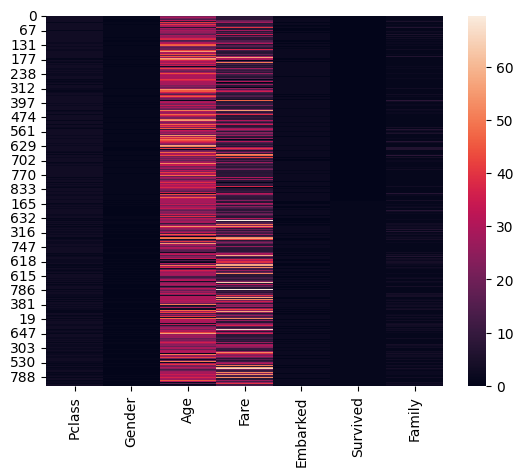

In [ ]:
sns.heatmap(df)

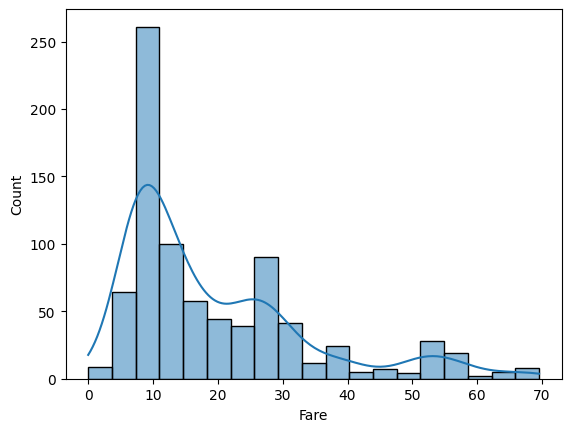

In [ ]:
sns.histplot(df['Fare'], kde=True)
plt.show()

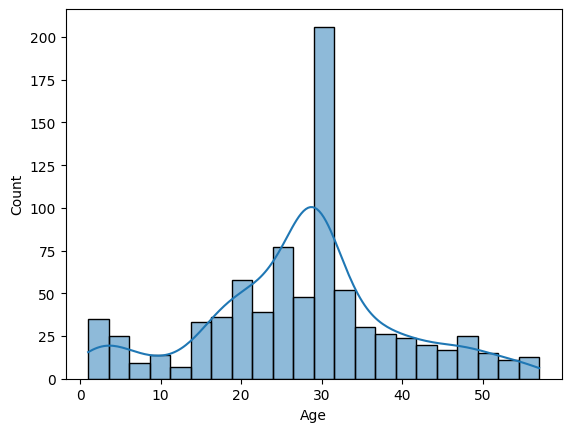

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()

# Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Feature Selection

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X, y)

feature_importance = elastic_net.coef_

selected_features = X.columns[elastic_net.coef_ != 0].tolist()

print(f"Selected features based on ElasticNet: {selected_features}")

Selected features based on ElasticNet: ['Pclass', 'Gender', 'Age', 'Fare', 'Embarked', 'Family']


In [ ]:
X = X[selected_features]
X.head()

,Pclass,Gender,Age,Fare,Embarked,Family
0,3,1,22,7.2500,2,2
4,3,1,35,8.0500,2,1
5,3,1,29,8.4583,1,1
6,1,1,54,51.8625,2,1
7,3,1,2,21.0750,2,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])
y_pred, y_test[0:10]

(array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1]),
 184    1
 725    0
 135    0
 56     1
 864    0
 451    0
 216    1
 162    0
 842    1
 717    1
 Name: Survived, dtype: int64)

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[0.14494663, 0.85505337],
       [0.86239942, 0.13760058],
       [0.28226939, 0.71773061],
       [0.16058833, 0.83941167],
       [0.75942135, 0.24057865],
       [0.83893533, 0.16106467],
       [0.32216438, 0.67783562],
       [0.8807415 , 0.1192585 ],
       [0.0045228 , 0.9954772 ],
       [0.18150334, 0.81849666]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[57, 25],
       [16, 66]])

Text(50.722222222222214, 0.5, 'True Labels')

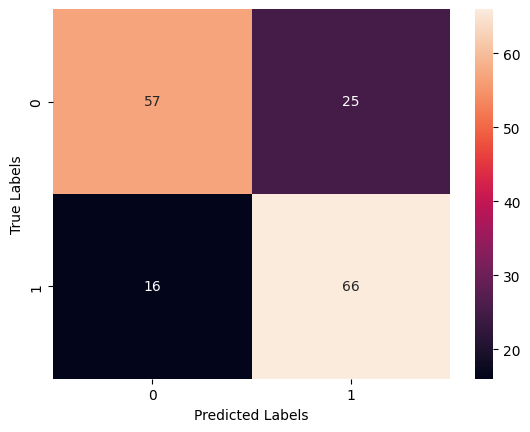

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        82
           1       0.73      0.80      0.76        82

    accuracy                           0.75       164
   macro avg       0.75      0.75      0.75       164
weighted avg       0.75      0.75      0.75       164



In [ ]:
from sklearn.naive_bayes import CategoricalNB

# Categorical Naive Bayes

In [ ]:
X['Age'] = pd.cut(X['Age'], bins=5, labels=False)
X['Fare'] = pd.cut(X['Fare'], bins=5, labels=False)
X['Family'] = pd.cut(X['Family'], bins=5, labels=False)
X.head()

,Pclass,Gender,Age,Fare,Embarked,Family
0,3,1,1,0,2,0
4,3,1,3,0,2,0
5,3,1,2,0,1,0
6,1,1,4,3,2,0
7,3,1,0,1,2,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[0.15892263, 0.84107737],
       [0.87398357, 0.12601643],
       [0.29753647, 0.70246353],
       [0.20575934, 0.79424066],
       [0.58740354, 0.41259646],
       [0.72060676, 0.27939324],
       [0.38064397, 0.61935603],
       [0.82876183, 0.17123817],
       [0.05015841, 0.94984159],
       [0.15310521, 0.84689479]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[57, 25],
       [19, 63]])

Text(50.722222222222214, 0.5, 'True Labels')

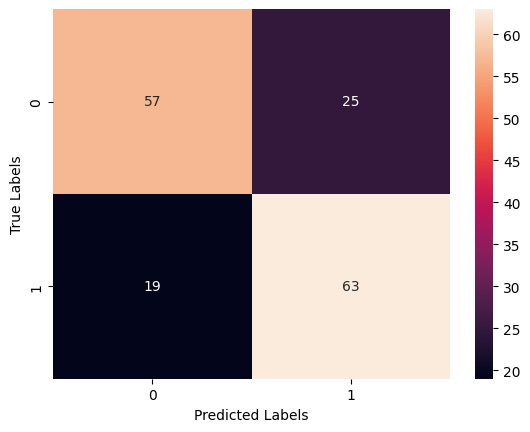

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        82
           1       0.72      0.77      0.74        82

    accuracy                           0.73       164
   macro avg       0.73      0.73      0.73       164
weighted avg       0.73      0.73      0.73       164



# Model Tuning
